In [55]:
# 使用iris数据集
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
x,y = iris.data,iris.target


# 1. Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # 基学习器,这里使用决策树
    n_estimators=100,                    # 基学习器数量(其实就是集成学习的个数)
    bootstrap=True,                      # 是否有放回采样（True表示有放回采样）
    max_samples=10,                      # 每次抽样的样本数,也就是每次取500个样本训练
    oob_score=True,                      # 是否使用袋外样本来评估模型(当true时,需要设置bootstrap=True,且不需要划分测试集和训练集)    
    n_jobs=-1,                           # 并行数，-1表示使用所有CPU
    random_state=20                      # 随机种子
)
bagging.fit(x, y)
bagging.oob_score_

0.9533333333333334

# 2. Random Forest Trees

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(
    n_estimators=100,      # 随机森林中树的数量
    max_samples=10,        # 每棵树训练时抽取的样本数
    max_leaf_nodes=16,     # 每棵树的最大叶节点数(还可以设置决策树max_depth, max_features等参数)
    oob_score=True,        # 是否使用袋外样本评估模型
    n_jobs=-1,             # 并行数，-1表示使用所有CPU
    random_state=20        # 随机种子，保证结果可复现
)
rf_clf.fit(x,y)
rf_clf.oob_score_

0.94

####  提取特征的重要性  feature_importances_

In [58]:
rf_clf.feature_importances_

array([0.19402248, 0.08120776, 0.37071168, 0.35405808])

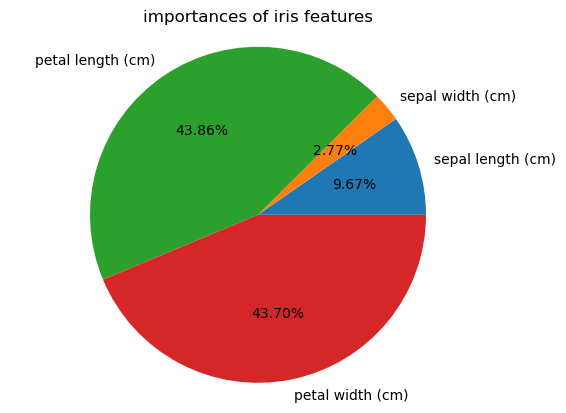

In [61]:
import matplotlib.pyplot as plt
labels =np.array(iris.feature_names)  # 各部分的标签
importances = rf_clf.feature_importances_
# 绘制饼图
plt.pie(importances, labels=labels,  autopct='%1.2f%%')
plt.axis('equal') # 设置图形为圆形
plt.title('importances of iris features')
plt.show()

# 3. Extra-Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier(
    n_estimators=100,      # 森林中树的数量
    max_samples=10,        # 每棵树训练时抽取的样本数
    bootstrap=True,        # 是否有放回采样（True表示有放回采样）
    oob_score=True,        # 是否使用袋外样本评估模型
    n_jobs=-1,             # 并行数，-1表示使用所有CPU
    random_state=20        # 随机种子，保证结果可复现
)
et_clf.fit(x,y)
et_clf.oob_score_

0.94